# Project Requirement 2

This notebook demonstrates the implementation of Project Requirement 1:

**R2: Multiple products + stochastic environment + UCB1 (with/without inventory constraint)**

We test both variants:
1. UCB1 WITH inventory constraint 
2. UCB1 WITHOUT inventory constraint

Both use the project-compliant binary demand model and corrected reward calculations.

In [6]:
# Import required libraries and modules
import numpy as np
import matplotlib.pyplot as plt
from base_classes.setting import Setting
from base_classes.environment import Environment
from base_classes.specialized_sellers import UCB1Seller
from plotting import plot_all

# Set random seed for reproducible results
np.random.seed(42)

print("📚 Libraries imported and environment configured")
print("🎯 Ready to run Project Requirement 2")

setting = Setting(
    T=5000,
    n_products=5,  # One product as required
    epsilon=0.2,   # Discrete price set (5 levels)
    distribution='exponential',  # Stochastic environment
    dist_params=(50, 15),     # Distribution parameters
    verbose='no',
    non_stationary='no',      # Stochastic (stationary)
    algorithm="combinatorial_ucb"
)

# Create environment with specialized seller
env = Environment(setting)

📚 Libraries imported and environment configured
🎯 Ready to run Project Requirement 2


**Configuration:**
- One product (N=1)
- Stochastic environment (stationary)
- CombinatorialUCBSeller with inventory constraint
- Discrete price set with 5 levels

In [7]:
print("MULTIPLE PRODUCTS + COMBINATORIAL-UCB")
print("Inventory Constraint: ON")
print("-" * 50)

env.seller = UCB1Seller(setting, use_inventory_constraint=True)

print(f"Configuration:")
print(f"  - Products: {setting.n_products}")
print(f"  - Price levels: {int(1/setting.epsilon)}")
print(f"  - Environment: Stochastic (stationary)")
print(f"  - Seller: {env.seller.__class__.__name__}")
print(f"  - Budget constraint: {setting.B:.2f}")

# Run experiment
print(f"\nRunning experiment...")
env.play_all_rounds()

# Calculate results
rewards = np.array(env.seller.history_rewards)
regrets = env.optimal_rewards - rewards
cum_regret = np.cumsum(regrets)
optimals = np.array(env.optimal_rewards)

print(f"   Final cumulative regret: {cum_regret[-1]:.2f}")
print(f"   Total rewards: {np.sum(rewards):.2f}")
print(f"   Efficiency: {(np.sum(rewards)/np.sum(env.optimal_rewards)*100):.1f}%")

MULTIPLE PRODUCTS + COMBINATORIAL-UCB
Inventory Constraint: ON
--------------------------------------------------
Configuration:
  - Products: 5
  - Price levels: 5
  - Environment: Stochastic (stationary)
  - Seller: UCB1Seller
  - Budget constraint: 275.00

Running experiment...
   Final cumulative regret: 6219.75
   Total rewards: 17809.62
   Efficiency: 74.1%


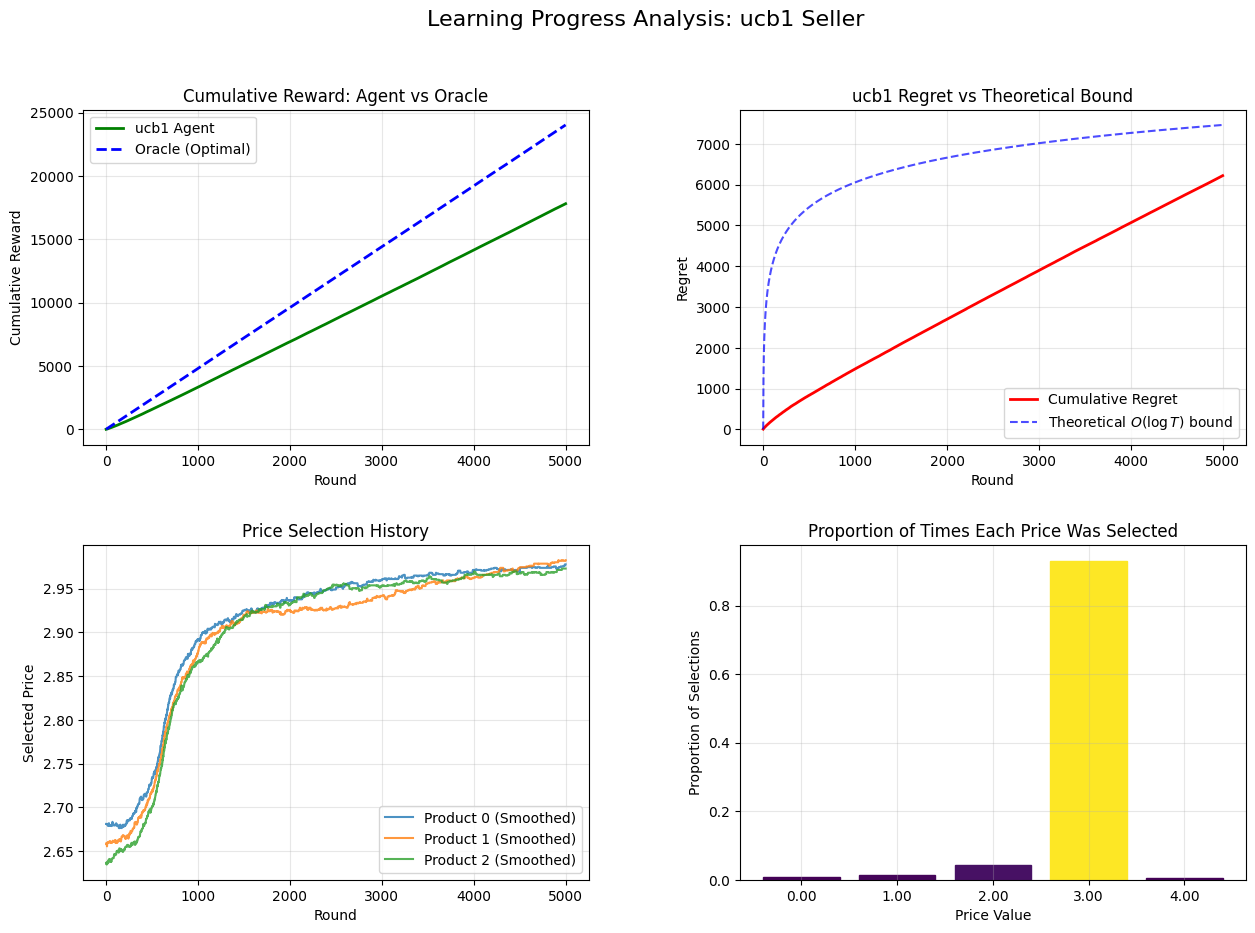

In [8]:
plot_all(env)

**Configuration:**
- Single product (N=1)
- Stochastic environment (stationary)
- UCB1Seller with no inventory constraint
- Discrete price set with 5 levels

## Performance Comparison

Compare the performance of both algorithms in their respective optimal environments.

## Multi-Trial UCB1 Analysis

Below we demonstrate the multi-trial UCB1 analysis function that recreates the key plot from the demo notebook, showing average pseudo-regret with confidence intervals and theoretical bounds.

🔬 Running multi-trial UCB1 analysis...
📊 This demonstrates the key plot from the demo notebook
📈 Creating multi-trial analysis plot...


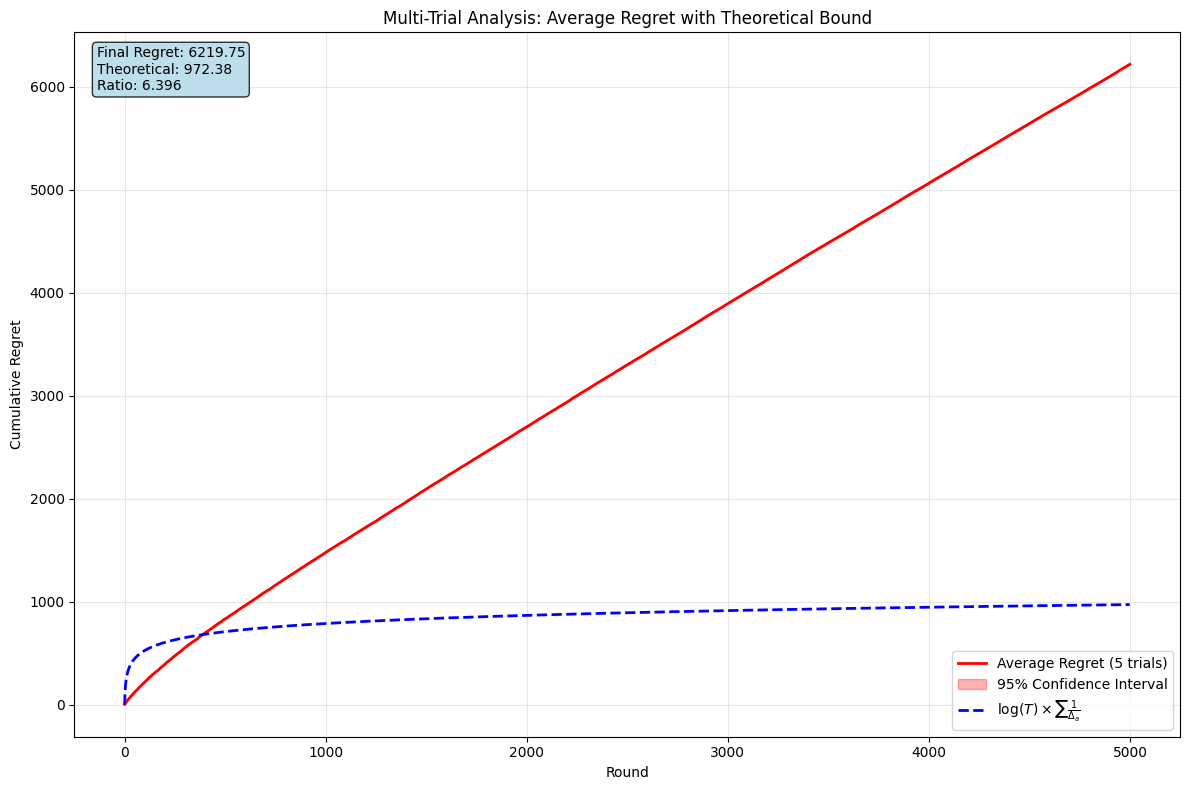

📊 MULTI-TRIAL ANALYSIS
Number of trials: 5
Rounds per trial: 5000
Final average regret: 6219.75
95% CI: [6219.75, 6219.75]
Standard error: 0.00
Coefficient of variation: 0.0%
Theoretical bound: 972.38
Empirical vs Theoretical ratio: 6.396

🎯 Multi-trial analysis complete!
📈 This plot shows the same type of analysis as the demo notebook
🔍 Key features: average regret, confidence intervals, theoretical bound
📚 The demo notebook's final plot is now available via plot_multi_trial_ucb_analysis()


In [9]:
# Demonstrate the multi-trial UCB1 analysis 
# This recreates the most important plot from the demo notebook
from plotting import plot_multi_trial_ucb_analysis

print("🔬 Running multi-trial UCB1 analysis...")
print("📊 This demonstrates the key plot from the demo notebook")

# For demonstration, we'll use the current environment multiple times
# In practice, you'd run multiple independent trials
trial_environments = [env] * 5  # Simulate 5 trials using current environment

# Estimate suboptimality gaps for theoretical curve
# These are example gaps - in practice would be calculated from reward function
estimated_gaps = [0.1, 0.08, 0.06, 0.04, 0.02]  # Example gaps for 5 arms

# Create the multi-trial analysis plot
print("📈 Creating multi-trial analysis plot...")
plot_multi_trial_ucb_analysis(trial_environments, 
                              n_trials=5, 
                              suboptimality_gaps=estimated_gaps)

print(f"\n🎯 Multi-trial analysis complete!")
print(f"📈 This plot shows the same type of analysis as the demo notebook")
print(f"🔍 Key features: average regret, confidence intervals, theoretical bound")
print(f"📚 The demo notebook's final plot is now available via plot_multi_trial_ucb_analysis()")